In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
%matplotlib inline
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
happy_data = pd.read_csv('2017WorldHappiness.csv')

In [3]:
happy_data.head()

,Country,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,GovernmentTrust,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


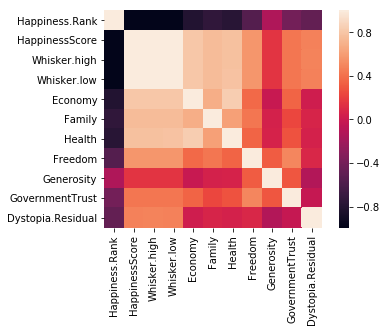

In [4]:
sns.heatmap(happy_data.corr(), square = True);

In [5]:
happy_data.corr()

,Happiness.Rank,HappinessScore,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,GovernmentTrust,Dystopia.Residual
Happiness.Rank,1.000000,-0.992774,-0.993058,-0.991533,-0.813244,-0.736753,-0.780716,-0.551608,-0.132620,-0.405842,-0.484506
HappinessScore,-0.992774,1.000000,0.999497,0.999520,0.812469,0.752737,0.781951,0.570137,0.155256,0.429080,0.475355
Whisker.high,-0.993058,0.999497,1.000000,0.998036,0.811868,0.750934,0.776634,0.569907,0.155462,0.426459,0.478824
Whisker.low,-0.991533,0.999520,0.998036,1.000000,0.812267,0.753767,0.786385,0.569808,0.154904,0.431223,0.471505
Economy,-0.813244,0.812469,0.811868,0.812267,1.000000,0.688296,0.843077,0.369873,-0.019011,0.350944,0.024226
Family,-0.736753,0.752737,0.750934,0.753767,0.688296,1.000000,0.612080,0.424966,0.051693,0.231841,0.070506
Health,-0.780716,0.781951,0.776634,0.786385,0.843077,0.612080,1.000000,0.349827,0.063191,0.279752,0.054963
Freedom,-0.551608,0.570137,0.569907,0.569808,0.369873,0.424966,0.349827,1.000000,0.316083,0.499183,0.081926
Generosity,-0.132620,0.155256,0.155462,0.154904,-0.019011,0.051693,0.063191,0.316083,1.000000,0.294159,-0.116627
GovernmentTrust,-0.405842,0.429080,0.426459,0.431223,0.350944,0.231841,0.279752,0.499183,0.294159,1.000000,-0.022755


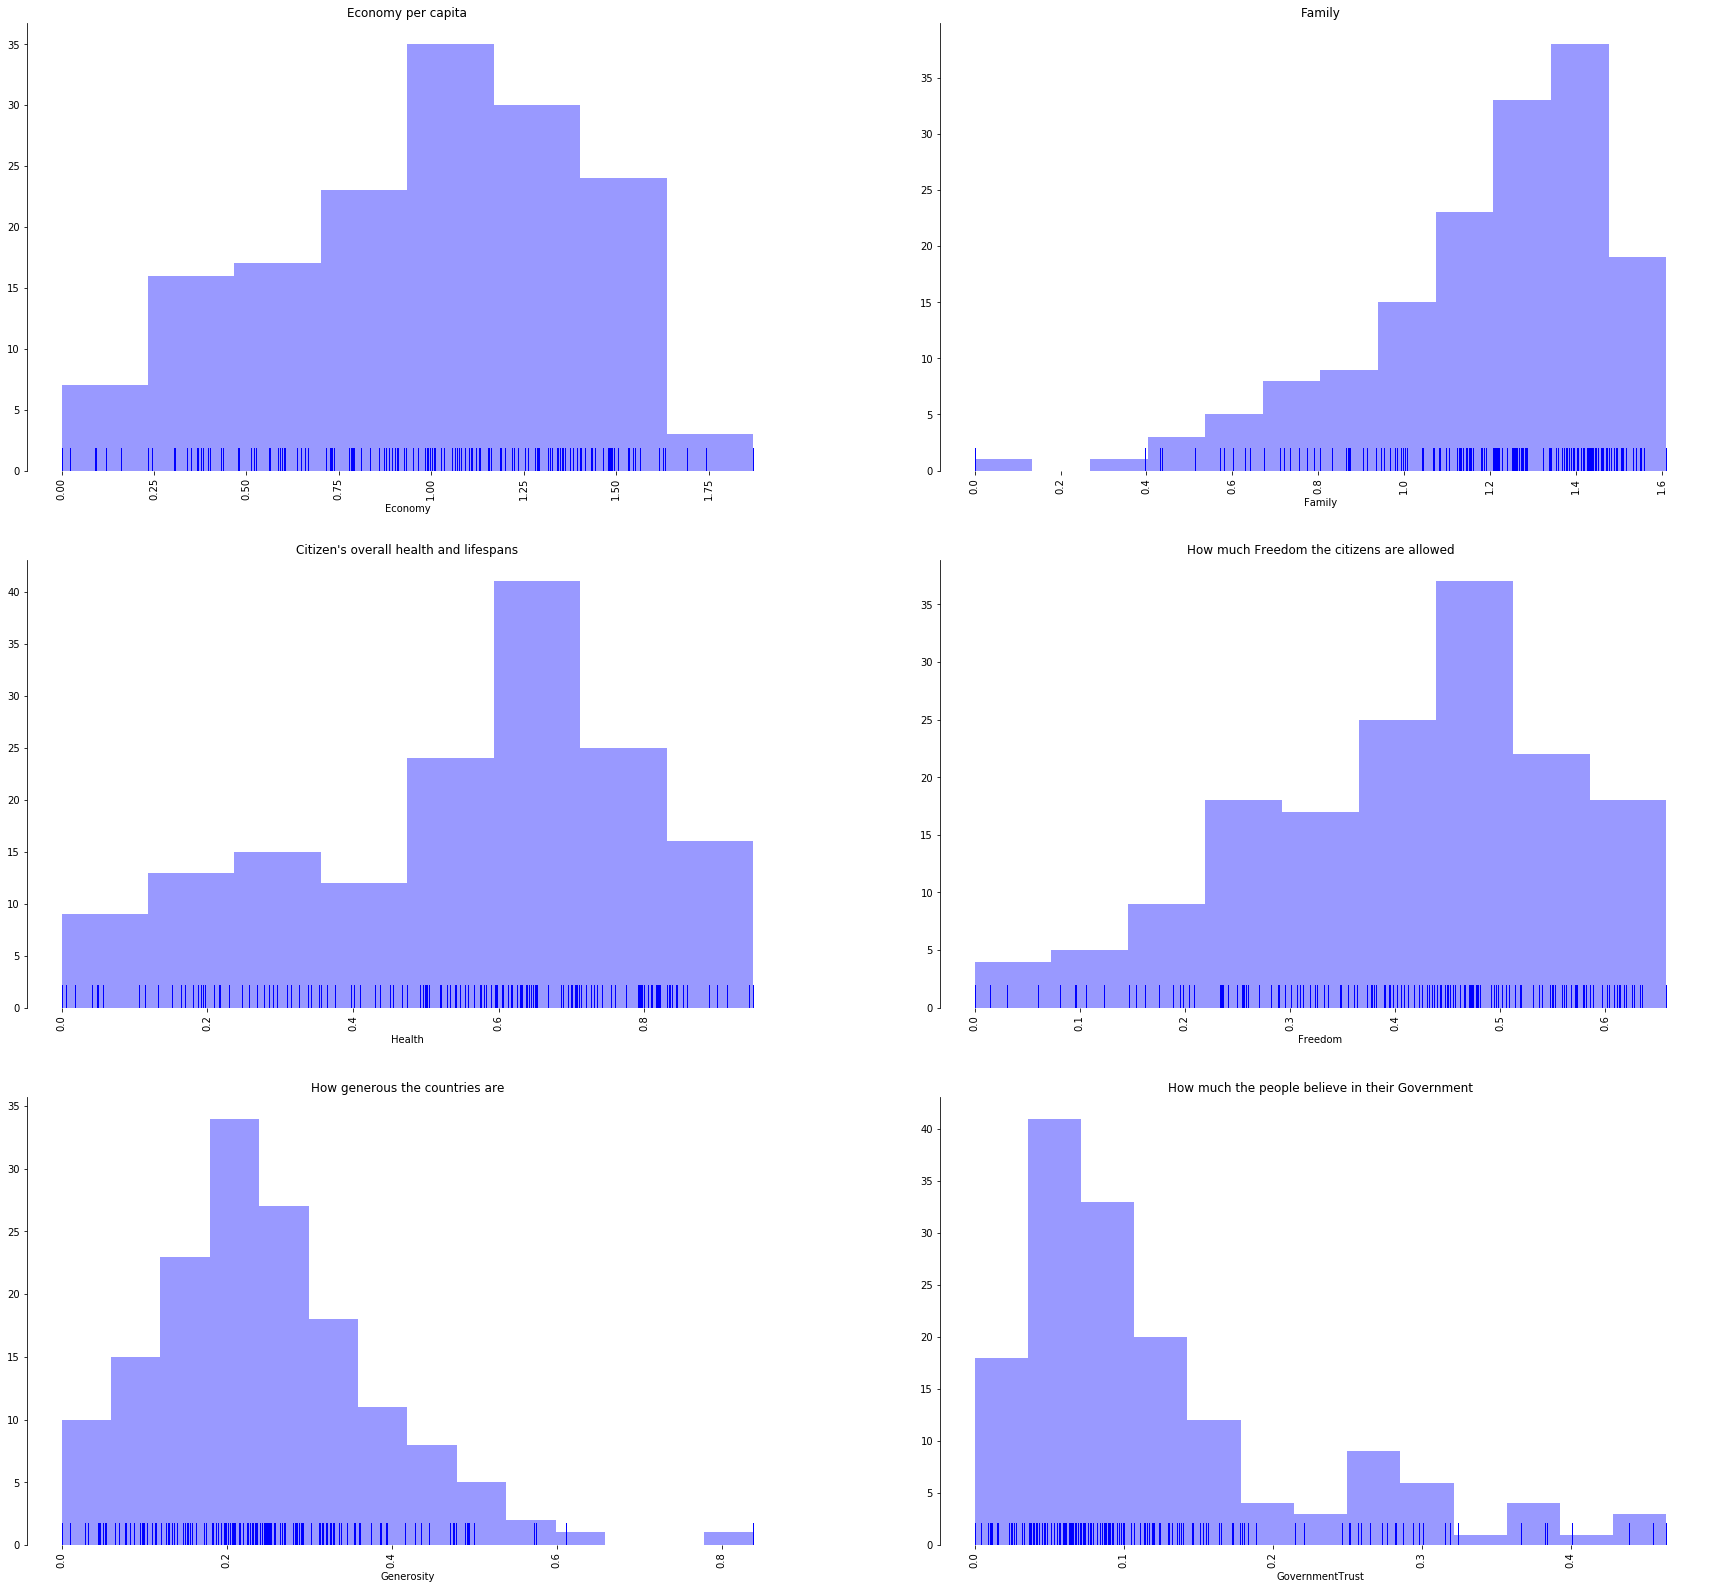

In [14]:
plt.figure(figsize=(30, 28))
plt.subplot(3, 2, 1)
sns.distplot(happy_data.Economy, color="b", rug = True, kde = False)
plt.title('Economy per capita')
plt.xlabel("Economy")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 2)
sns.distplot(happy_data.Family, color="b", rug = True, kde = False)
plt.title('Family')
plt.xlabel("Family")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 3)
sns.distplot(happy_data.Health, color="b", rug = True, kde = False)
plt.legend(ncol=2, loc="upper right", frameon=True)
plt.title("Citizen's overall health and lifespans")
plt.xlabel("Health")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 4)
sns.distplot(happy_data.Freedom, color="b", rug = True, kde = False)
plt.title('How much Freedom the citizens are allowed')
plt.xlabel("Freedom")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 5)
sns.distplot(happy_data.Generosity, color="b", rug = True, kde = False)
plt.title('How generous the countries are')
plt.xlabel("Generosity")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)

plt.subplot(3, 2, 6)
sns.distplot(happy_data.GovernmentTrust, color="b", rug = True, kde = False)
plt.title('How much the people believe in their Government')
plt.xlabel("GovernmentTrust")
plt.xticks(rotation = 90)
sns.despine(left=False, bottom=True)
plt.show()

In [8]:
df_pca = happy_data.copy()

In [9]:
del df_pca['Country']
del df_pca['Happiness.Rank']

In [11]:
df_pca['happy'] = happy_data['Happiness.Rank'] < happy_data['Happiness.Rank'].quantile(0.50)

In [30]:
df_pca['HappinessScore'] = (happy_data['HappinessScore'] - happy_data['HappinessScore'].mean()) / happy_data['HappinessScore'].std()
df_pca['Whisker.high'] = (happy_data['Whisker.high'] - happy_data['Whisker.high'].mean()) / happy_data['Whisker.high'].std()
df_pca['Whisker.low'] = (happy_data['Whisker.low'] - happy_data['Whisker.low'].mean()) / happy_data['Whisker.low'].std()
df_pca['Economy'] = (happy_data['Economy'] - happy_data['Economy'].mean()) / happy_data['Economy'].std()
df_pca['Family'] = (happy_data['Family'] - happy_data['Family'].mean()) / happy_data['Family'].std()
df_pca['Health'] = (happy_data['Health'] - happy_data['Health'].mean()) / happy_data['Health'].std()
df_pca['Freedom'] = (happy_data['Freedom'] - happy_data['Freedom'].mean()) / happy_data['Freedom'].std()
df_pca['Generosity'] = (happy_data['Generosity'] - happy_data['Generosity'].mean()) / happy_data['Generosity'].std()
df_pca['GovernmentTrust'] = (happy_data['GovernmentTrust'] - happy_data['GovernmentTrust'].mean()) / happy_data['GovernmentTrust'].std()
df_pca['Dystopia.Residual'] = (happy_data['Dystopia.Residual'] - happy_data['Dystopia.Residual'].mean()) / happy_data['Dystopia.Residual'].std()
df_pca['happy'] = (happy_data['happy'] - happy_data['happy'].mean()) / happy_data['happy'].std()

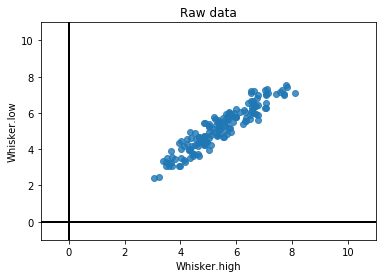

In [16]:
t = sns.regplot(happy_data['Whisker.high'], happy_data['Whisker.low'], x_jitter=.49,
    y_jitter=.49, fit_reg=False)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

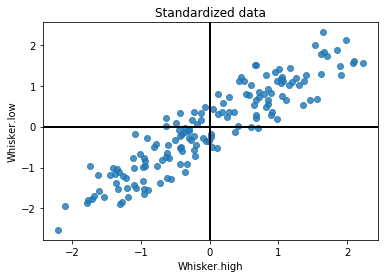

In [17]:
t = sns.regplot(
    df_pca['Whisker.high'],
    df_pca['Whisker.low'],
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()        

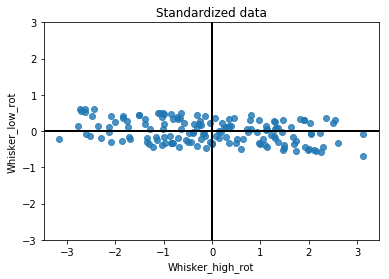

In [18]:
df_pca['Whisker_high_rot'] = math.cos(40) * df_pca['Whisker.high'] - math.sin(40) * df_pca['Whisker.high']
df_pca['Whisker_low_rot'] = math.sin(40) * df_pca['Whisker.low'] + math.cos(40) * df_pca['Whisker.low']

t = sns.regplot(
    df_pca['Whisker_high_rot'],
    df_pca['Whisker_low_rot'],
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.ylim(-3, 3)
plt.show()         

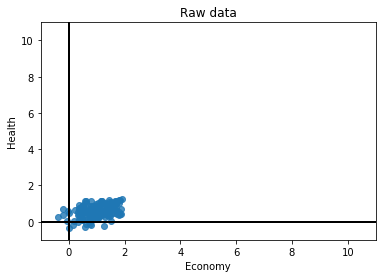

In [19]:
 
t = sns.regplot(happy_data['Economy'], happy_data['Health'], x_jitter=.49,
    y_jitter=.49, fit_reg=False)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

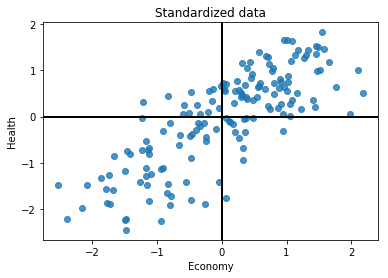

In [20]:
t = sns.regplot(
    df_pca['Economy'],
    df_pca['Health'],
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()   

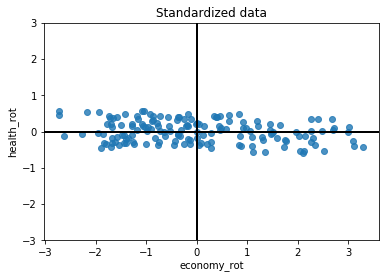

In [21]:
df_pca['economy_rot'] = math.cos(40) * df_pca['Economy'] - math.sin(40) * df_pca['Economy']
df_pca['health_rot'] = math.sin(40) * df_pca['Health'] + math.cos(40) * df_pca['Health']
t = sns.regplot(
    df_pca['economy_rot'],
    df_pca['health_rot'],
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.ylim(-3, 3)
plt.show()        

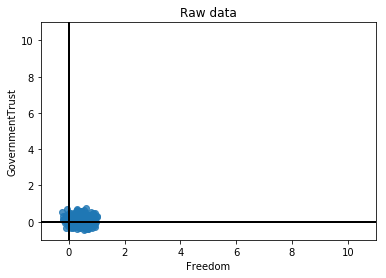

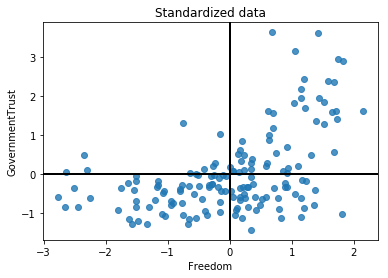

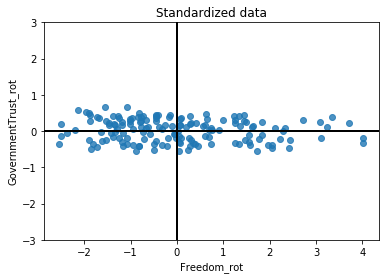

In [22]:

t = sns.regplot(happy_data['Freedom'], happy_data['GovernmentTrust'], x_jitter=.49,
    y_jitter=.49, fit_reg=False)
t.set(xlim=(-1, 11), ylim=(-1, 11))
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw data')
plt.show()

t = sns.regplot(
    df_pca['Freedom'],
    df_pca['GovernmentTrust'],
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.show()   

df_pca['Freedom_rot'] = math.cos(40) * df_pca['Freedom'] - math.sin(40) * df_pca['Freedom']
df_pca['GovernmentTrust_rot'] = math.sin(40) * df_pca['GovernmentTrust'] + math.cos(40) * df_pca['GovernmentTrust']

t = sns.regplot(
    df_pca['Freedom_rot'],
    df_pca['GovernmentTrust_rot'],
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')
plt.ylim(-3, 3)
plt.show()  

In [32]:
x = StandardScaler().fit_transform(df_pca)
xt = x.T
cx = np.cov(xt)
print('Covariance Matrix:\n', cx)

Covariance Matrix:
 [[ 1.00649351  1.00598766  1.0060108   0.81774453  0.75762457  0.78702823
   0.57383938  0.15626399  0.43186597  0.47844185 -1.00598766  1.0060108
  -0.81774453  0.78702823 -0.57383938  0.43186597  0.83190836]
 [ 1.00598766  1.00649351  1.00451716  0.81713945  0.75581042  0.78167758
   0.57360807  0.15647152  0.42922813  0.48193288 -1.00649351  1.00451716
  -0.81713945  0.78167758 -0.57360807  0.42922813  0.83467111]
 [ 1.0060108   1.00451716  1.00649351  0.81754195  0.75866145  0.79149125
   0.5735084   0.1559096   0.43402364  0.47456722 -1.00451716  1.00649351
  -0.81754195  0.79149125 -0.5735084   0.43402364  0.82840211]
 [ 0.81774453  0.81713945  0.81754195  1.00649351  0.69276577  0.84855116
   0.37227517 -0.0191347   0.35322296  0.02438373 -0.81713945  0.81754195
  -1.00649351  0.84855116 -0.37227517  0.35322296  0.71778812]
 [ 0.75762457  0.75581042  0.75866145  0.69276577  1.00649351  0.61605461
   0.42772527  0.05202829  0.23334685  0.07096359 -0.75581042  

In [33]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cx)

In [35]:
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 17).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')
print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[ 0.30313964]
 [ 0.30274398]
 [ 0.30323194]
 [ 0.26956596]
 [ 0.23758884]
 [ 0.2598341 ]
 [ 0.19454025]
 [ 0.05149418]
 [ 0.15753706]
 [ 0.09501112]
 [-0.30274398]
 [ 0.30323194]
 [-0.26956596]
 [ 0.2598341 ]
 [-0.19454025]
 [ 0.15753706]
 [ 0.25900829]]
Eigenvalue 1: 10.498508959988872
----------------------------------------
Eigenvector 2: 
[[-0.04963306]
 [-0.05009397]
 [-0.04913465]
 [-0.15106279]
 [-0.10022673]
 [-0.16924406]
 [ 0.37710368]
 [ 0.36479727]
 [ 0.45975649]
 [-0.15227175]
 [ 0.05009397]
 [-0.04913465]
 [ 0.15106279]
 [-0.16924406]
 [-0.37710368]
 [ 0.45975649]
 [-0.10623893]]
Eigenvalue 2: 2.2833157930838035
----------------------------------------
Eigenvector 3: 
[[ -1.38859257e-01]
 [ -1.43202486e-01]
 [ -1.34481731e-01]
 [  2.83973165e-01]
 [  7.87174696e-02]
 [  2.70245461e-01]
 [ -1.20980547e-01]
 [ -4.08523087e-04]
 [  1.31964361e-01]
 [ -7.16932657e-01]
 [  1.43202486e-01]
 [ -1.34481731e-01]
 [ -2.83973165e-01]
 [  2.70245461e-01]
 [  1.209805

In [36]:
df_pca.columns

Index(['HappinessScore', 'Whisker.high', 'Whisker.low', 'Economy', 'Family',
       'Health', 'Freedom', 'Generosity', 'GovernmentTrust',
       'Dystopia.Residual', 'Whisker_high_rot', 'Whisker_low_rot',
       'economy_rot', 'health_rot', 'Freedom_rot', 'GovernmentTrust_rot',
       'happy'],
      dtype='object')

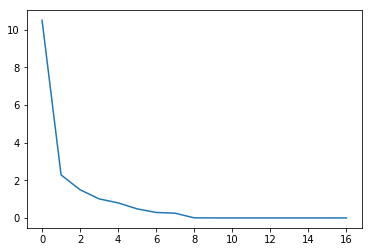

In [37]:
plt.plot(eig_val_cov)
plt.show()

C:\Users\blindside\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


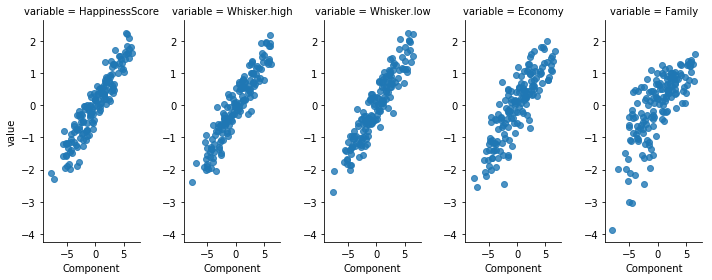

In [42]:
P = eig_vec_cov[:, 0]

# Transform X into Y.
Y = P.T.dot(xt)

data_to_plot = df_pca[['HappinessScore', 'Whisker.high', 'Whisker.low', 'Economy', 'Family']]
data_to_plot['Component'] = Y
data_to_plot = pd.melt(data_to_plot, id_vars='Component')

g = sns.FacetGrid(data_to_plot, col="variable", size=4, aspect=.5)
g = g.map(
    sns.regplot,
    "Component",
    "value",
    x_jitter=.49,
    y_jitter=.49,
    fit_reg=False
)
plt.show()

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [ 0.6135751   0.13344616  0.08741002  0.05906249  0.04665457]


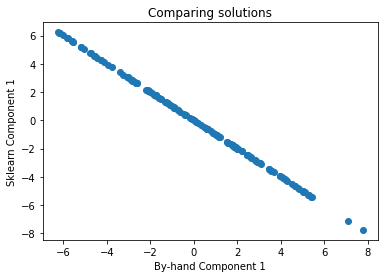

In [40]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(x)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()